In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("/content/sample_data/train.csv")
for i in df.columns:
    print(i)

id
target
home_team_name
away_team_name
match_date
league_name
league_id
is_cup
home_team_coach_id
away_team_coach_id
home_team_history_match_date_1
home_team_history_match_date_2
home_team_history_match_date_3
home_team_history_match_date_4
home_team_history_match_date_5
home_team_history_match_date_6
home_team_history_match_date_7
home_team_history_match_date_8
home_team_history_match_date_9
home_team_history_match_date_10
home_team_history_is_play_home_1
home_team_history_is_play_home_2
home_team_history_is_play_home_3
home_team_history_is_play_home_4
home_team_history_is_play_home_5
home_team_history_is_play_home_6
home_team_history_is_play_home_7
home_team_history_is_play_home_8
home_team_history_is_play_home_9
home_team_history_is_play_home_10
home_team_history_is_cup_1
home_team_history_is_cup_2
home_team_history_is_cup_3
home_team_history_is_cup_4
home_team_history_is_cup_5
home_team_history_is_cup_6
home_team_history_is_cup_7
home_team_history_is_cup_8
home_team_history_is_cup

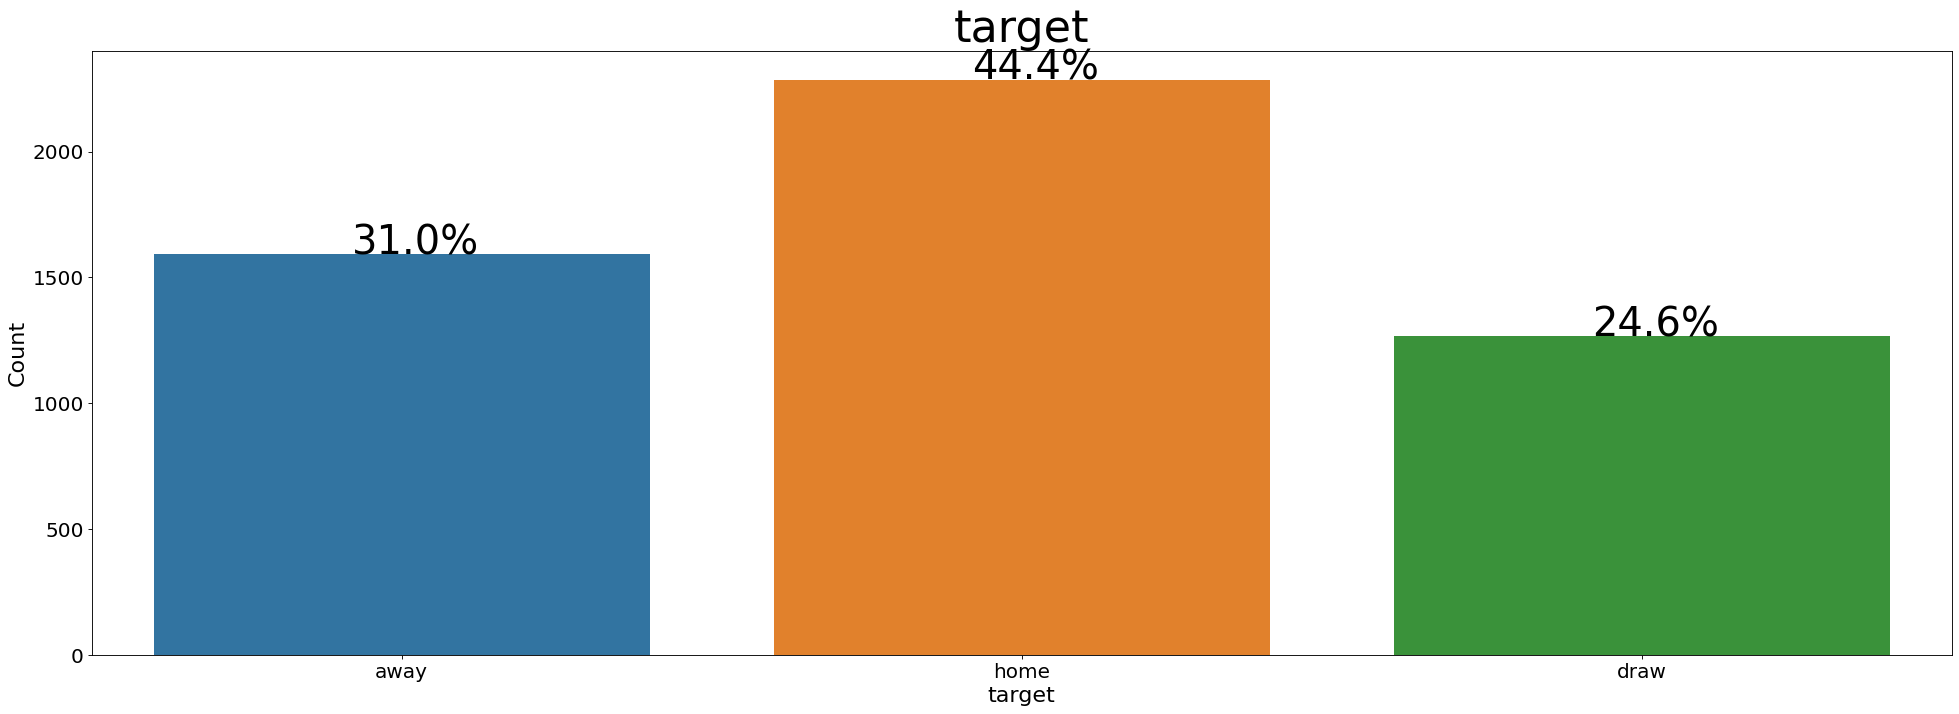

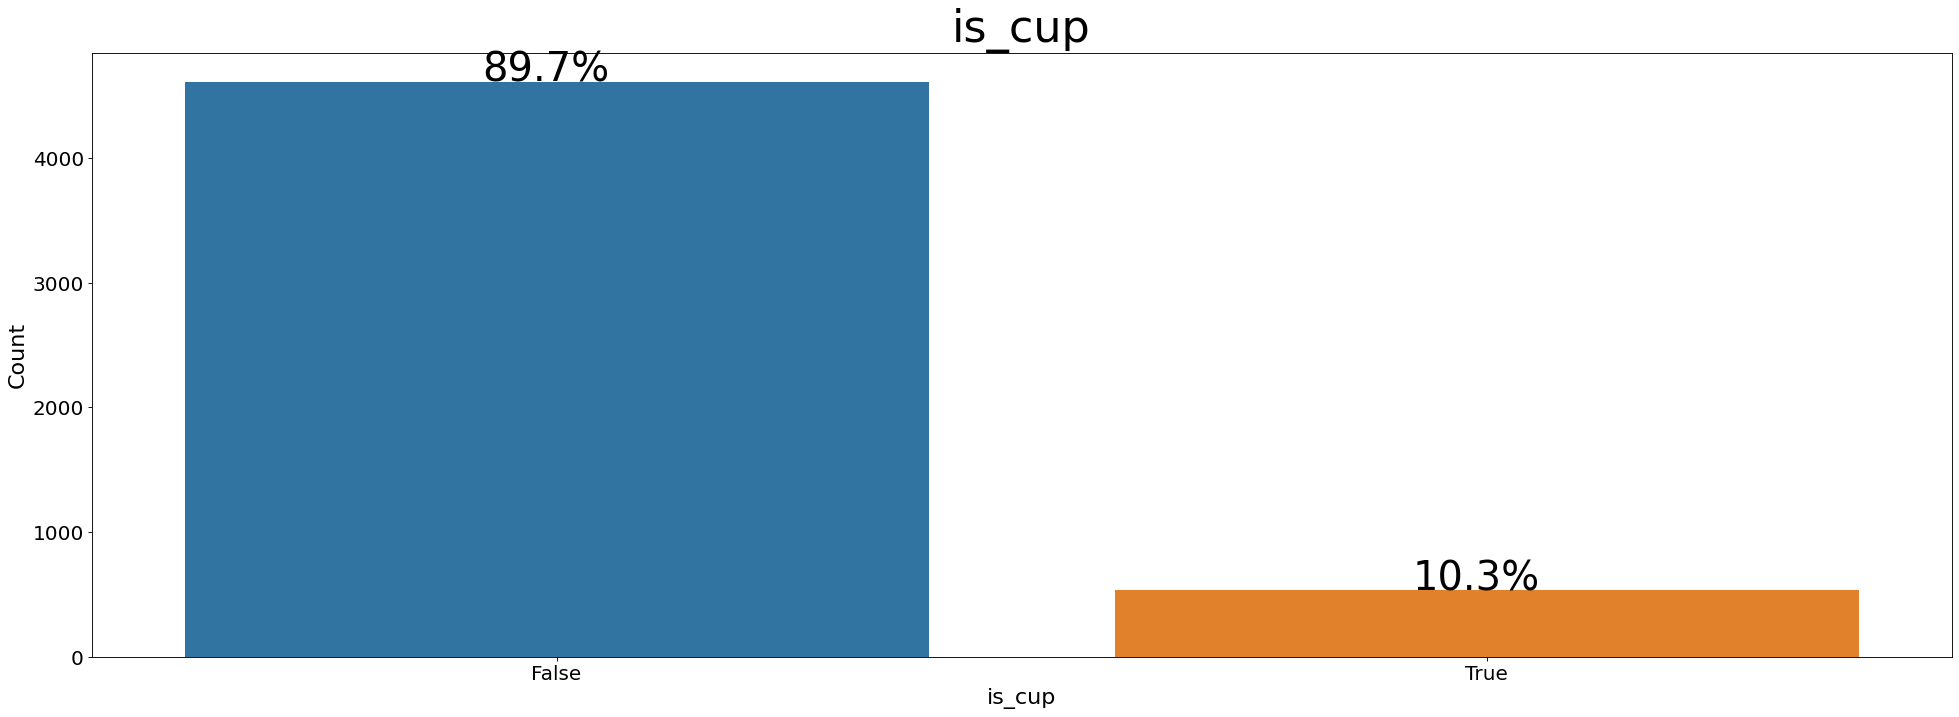

In [8]:
import seaborn as sns
from matplotlib.pyplot import figure


def without_hue(ax, feature,shift=0.08):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - shift
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 36)


features = ['target','is_cup']
sns.color_palette("crest", as_cmap=True)

for col in features:
    figure(figsize=(30, 10), dpi=80)
    ax = sns.countplot(x = df[col])
    plt.title(col, fontsize=40)
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel('Count',fontsize=20)
    without_hue(ax,df[col])
    ax.tick_params(axis='both', which='major', labelsize=18)
    plt.show()

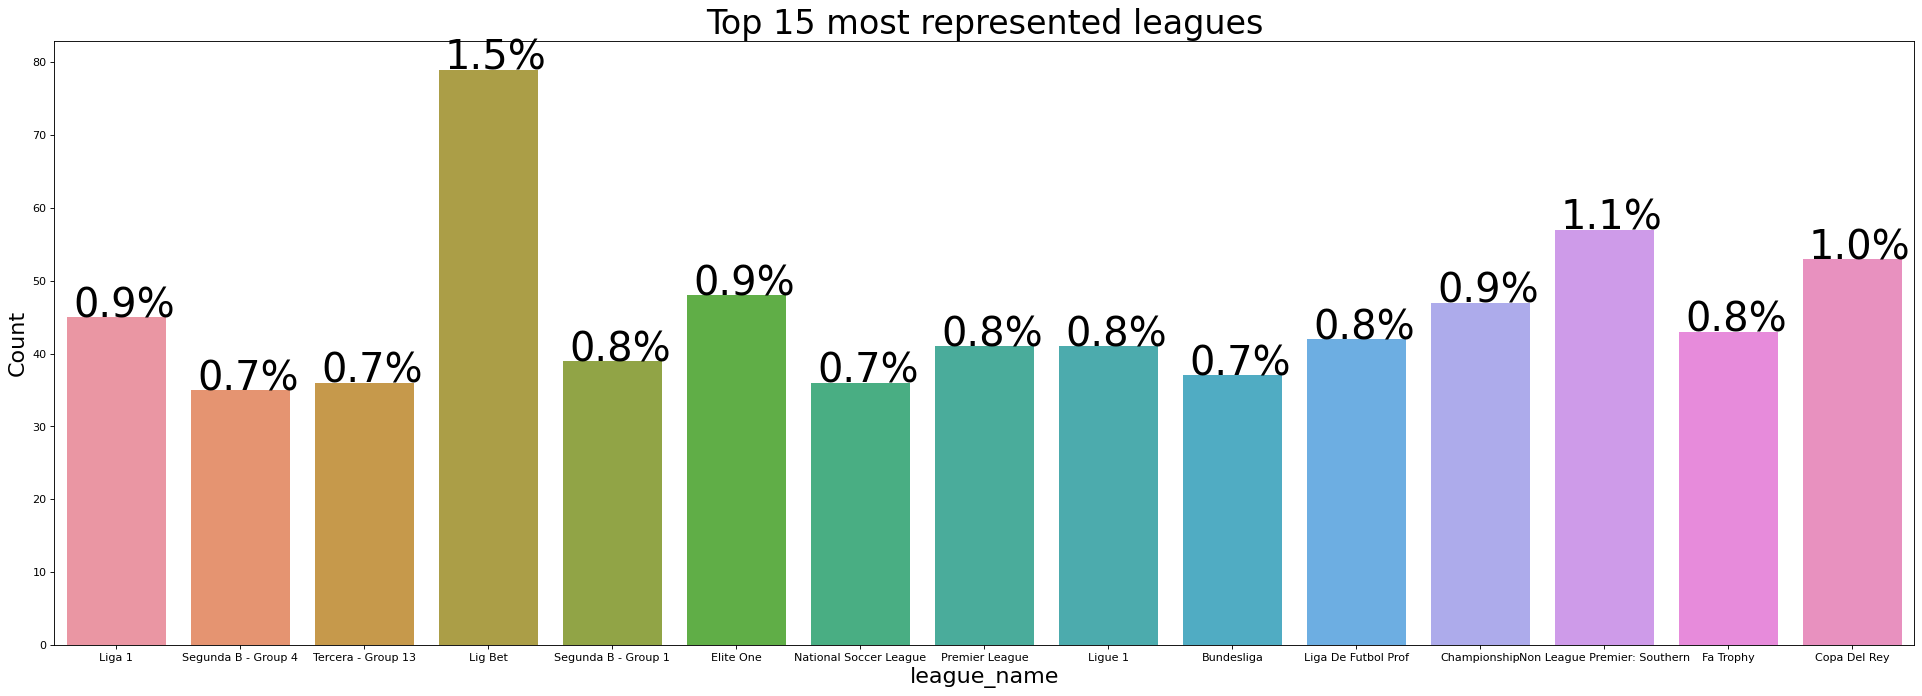

In [9]:
figure(figsize=(30, 10), dpi=80)
n = 15
sns.color_palette("crest", as_cmap=True)

col = 'league_name'
leagues = df['league_id'].value_counts()[:n].index.tolist()
ax = sns.countplot(x = df[df['league_id'].isin(leagues)][col])
plt.title("Top 15 most represented leagues",fontsize=30)
ax.set_xlabel(col, fontsize=20)
ax.set_ylabel('Count',fontsize=20)
without_hue(ax,df['league_id'],shift=0.35)

plt.show()

<Figure size 2400x800 with 0 Axes>

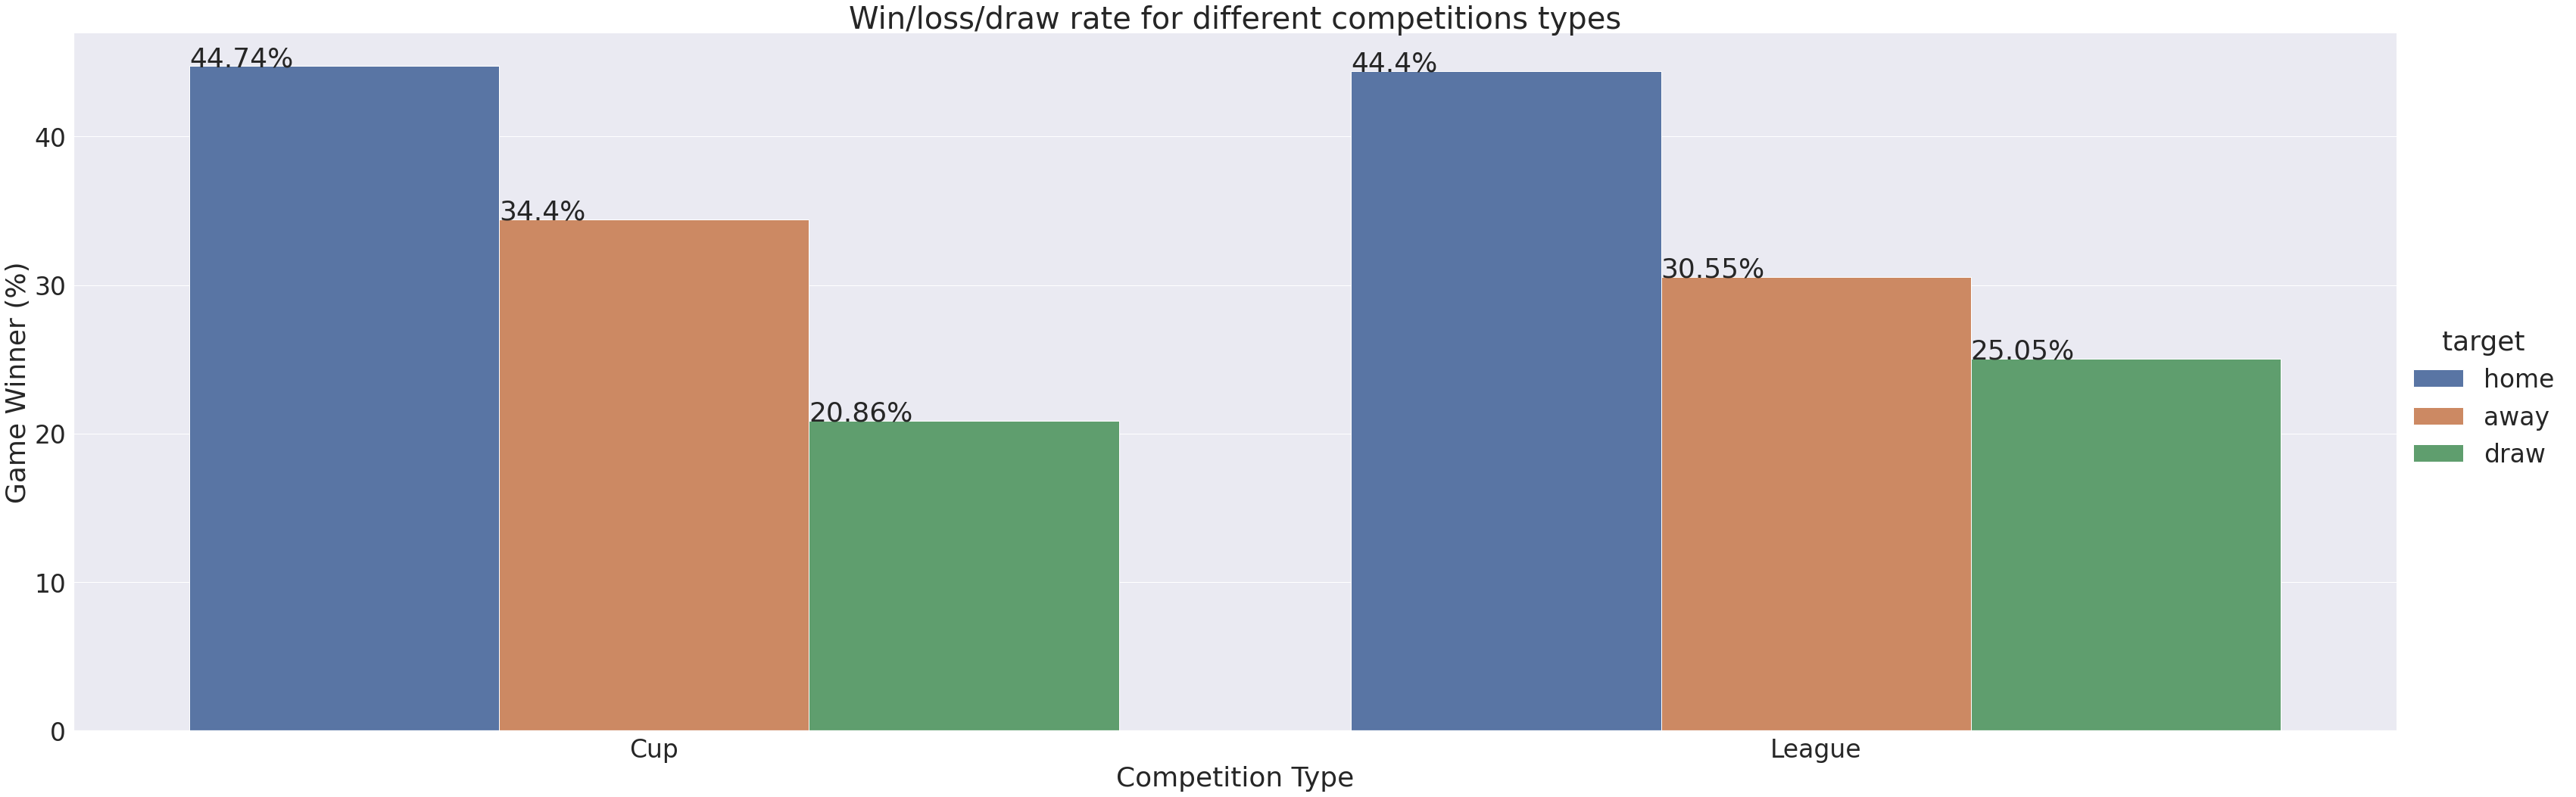

In [10]:
import seaborn as sns
from matplotlib.pyplot import figure


    

df2 = df.copy(deep=True)
df2.loc[df2['is_cup'] == False,'game_type'] = 'League'
df2.loc[df2['is_cup'] == True,'game_type'] = 'Cup'
df2.loc[df2['league_name'] == 'Club Friendlies','game_type'] = 'Friendly'

df1 = df2.groupby('game_type')['target'].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

features = ['target','game_type']
sns.color_palette("crest", as_cmap=True)
figure(figsize=(30, 10), dpi=80)
sns.set(font_scale=3)  # crazy big

g = sns.catplot(x="game_type",y='percent',hue='target',kind='bar',data=df1,height=15,aspect=3)
plt.title("Win/loss/draw rate for different competitions types", fontsize=40)
g.set_axis_labels("Competition Type","Game Winner (%)")
for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.show()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 2160x720 with 0 Axes>

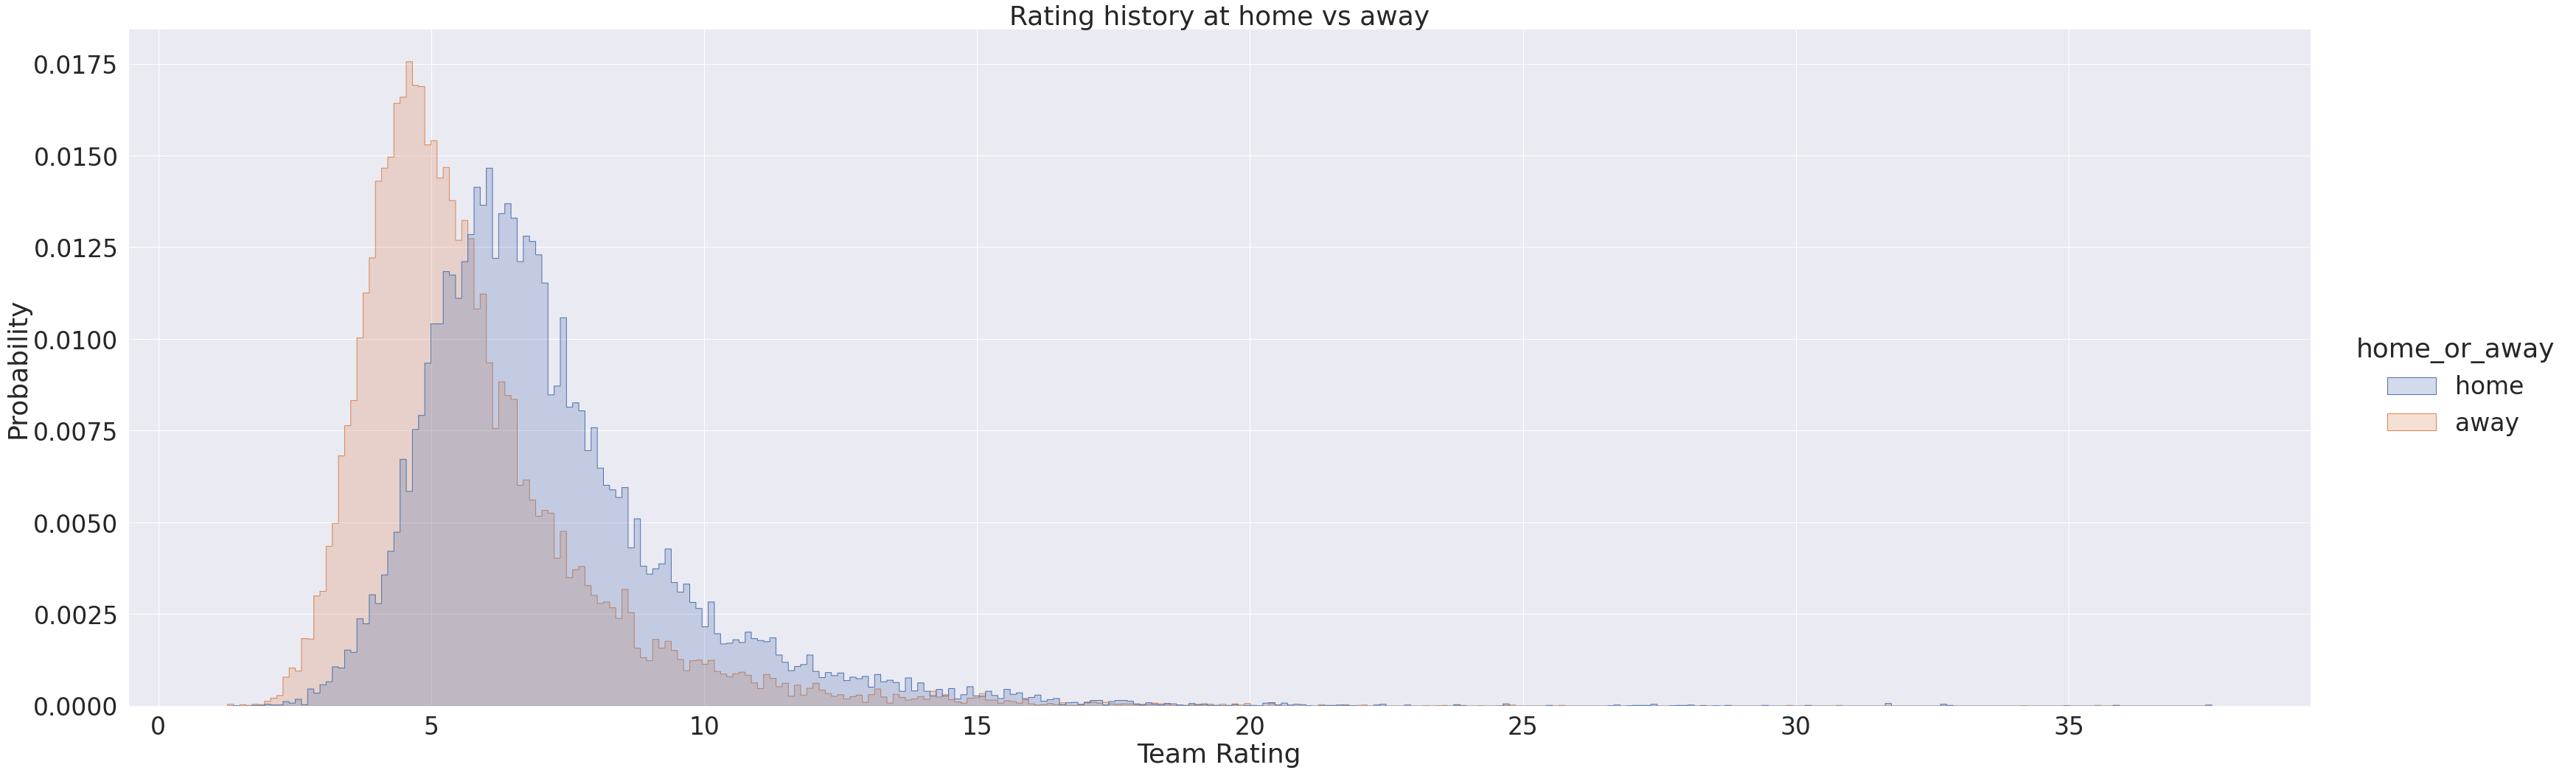

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


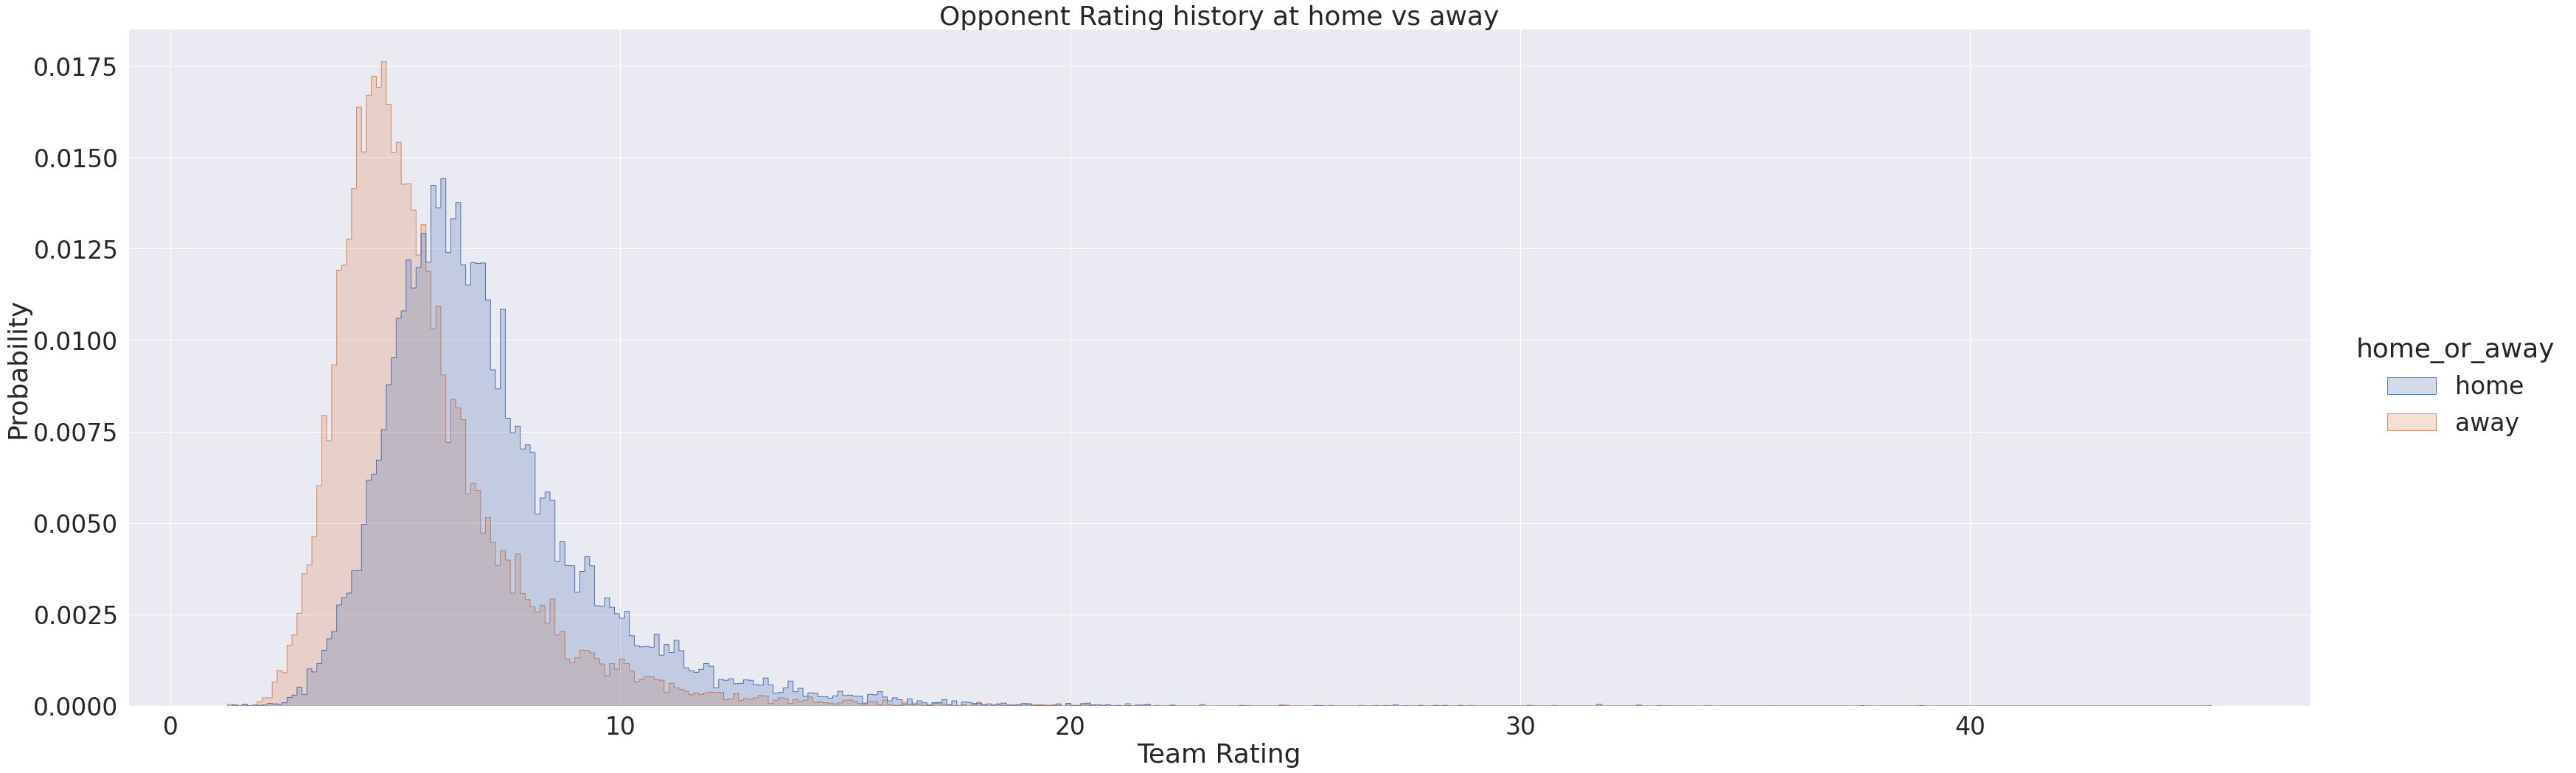

In [11]:
s = 'away_team_history_rating_'
s2 = 'home_team_history_rating_'
s3 = 'away_team_history_opponent_rating_'
s4 = 'home_team_history_opponent_rating_'
s_id = 'away_team_history_league_id'
s_id = 'home_team_history_league_id'

p = "away_team_history_is_play_home_"
p2 = "home_team_history_is_play_home_"
p3 = "away_team_opponent_history_is_play_home_"
p4 = "home_team_opponent_history_is_play_home_"

column_names = ["date"]
new_df = pd.DataFrame(columns = column_names)

history_df = df.loc[:, df.columns.str.contains(p)|df.columns.str.contains(p2)\
                    |df.columns.str.contains(s)|df.columns.str.contains(s2)|df.columns.str.contains(s3)|df.columns.str.contains(s4)|(df.columns == 'id')|(df.columns=='match_date')]
history_df = pd.wide_to_long(history_df, stubnames=[s,s2,s3,s4,p,p2,p3,p4], i="id",j='i')


style.use(style='seaborn')
plt.figure(figsize=(30,10))


history_df.loc[history_df[p2]==0.0,p4] = 'home'
history_df.loc[history_df[p2]==1.0,p4] = 'away'
history_df.loc[history_df[p]==0.0,p3] = 'home'
history_df.loc[history_df[p]==1.0,p3] = 'away'


history_df.loc[history_df[p2]==0.0,p2] = 'away'
history_df.loc[history_df[p2]==1.0,p2] = 'home'
history_df.loc[history_df[p]==0.0,p] = 'away'
history_df.loc[history_df[p]==1.0,p] = 'home'

order = ['home','away']

sns.set(font_scale=3)  # crazy big

res = pd.DataFrame(columns=['ratings','home_or_away'])
ps = [p,p2]
for i, v in enumerate([s,s2]):
    temp = history_df[[v,ps[i]]]
    temp.rename(columns={v: 'ratings', ps[i]: 'home_or_away'}, inplace=True)
    res = pd.concat([res,temp], axis=0)
res.reset_index(inplace=True)
ax = sns.displot(res,x='ratings',fill=True,element="step",kde=False,rug=False,hue='home_or_away',height=15,aspect=3,hue_order=order,stat="probability")
ax.set_axis_labels("Team Rating","Probability")
plt.title("Rating history at home vs away")
plt.show()

res = pd.DataFrame(columns=['ratings','home_or_away'])
ps = [p3,p4]
for i, v in enumerate([s3,s4]):
    temp = history_df[[v,ps[i]]]
    temp.rename(columns={v: 'ratings', ps[i]: 'home_or_away'}, inplace=True)
    res = pd.concat([res,temp], axis=0)
res.reset_index(inplace=True)
ax = sns.displot(res,x='ratings',fill=True,element="step",kde=False,rug=False,hue='home_or_away',height=15,aspect=3,hue_order=order,stat="probability")
ax.set_axis_labels("Team Rating","Probability")
plt.title("Opponent Rating history at home vs away")
plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<Figure size 2160x720 with 0 Axes>

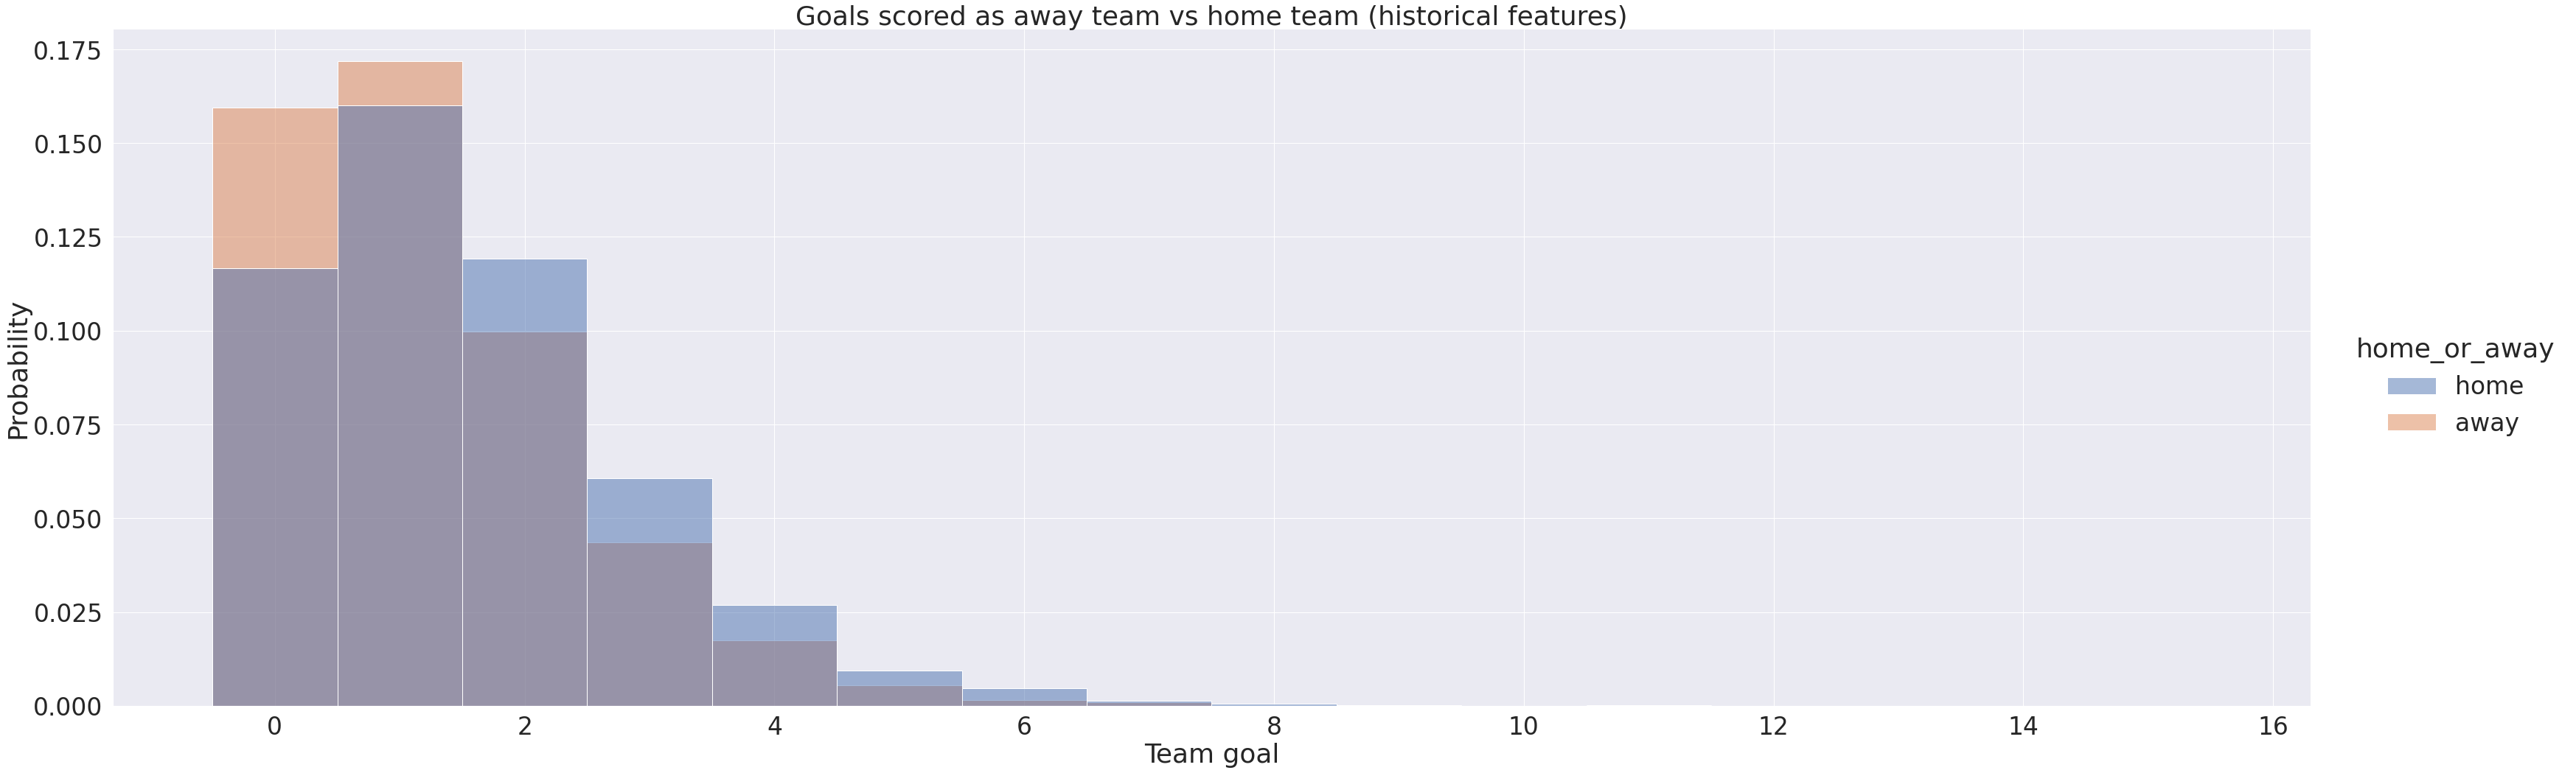

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


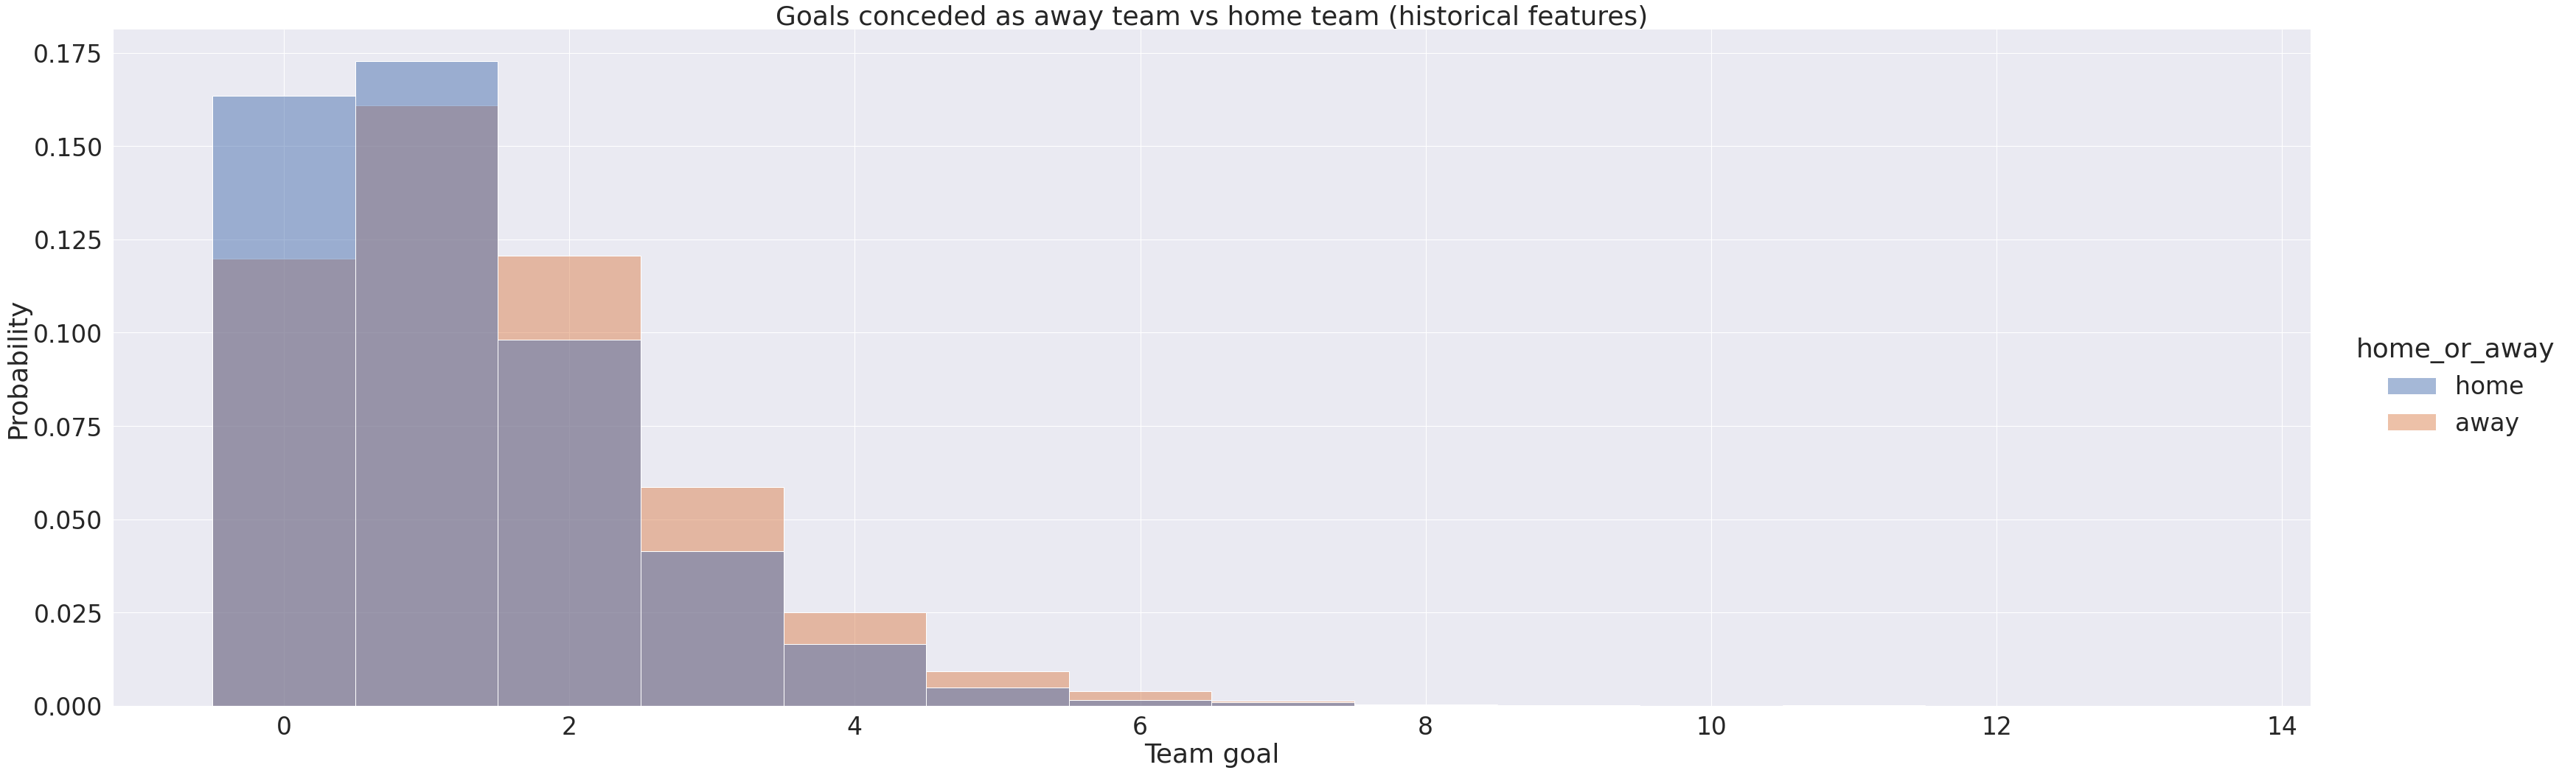

In [12]:
s2 = 'away_team_history_goal_'
s = 'home_team_history_goal_'
s4 = 'away_team_history_opponent_goal_'
s3 = 'home_team_history_opponent_goal_'
s_id = 'away_team_history_league_id'
s_id = 'home_team_history_league_id'

p2 = "away_team_history_is_play_home_"
p = "home_team_history_is_play_home_"
p4 = "away_team_opponent_history_is_play_home_"
p3 = "home_team_opponent_history_is_play_home_"

column_names = ["date"]
order = ['home','away']

new_df = pd.DataFrame(columns = column_names)

history_df = df.loc[:, df.columns.str.contains(p)|df.columns.str.contains(p2)\
                    |df.columns.str.contains(s)|df.columns.str.contains(s2)|df.columns.str.contains(s3)|df.columns.str.contains(s4)|(df.columns == 'id')|(df.columns=='match_date')]
history_df = pd.wide_to_long(history_df, stubnames=[s,s2,s3,s4,p,p2,p3,p4], i="id",j='i')


style.use(style='seaborn')
plt.figure(figsize=(30,10))


history_df.loc[history_df[p2]==1.0,p4] = 'home'
history_df.loc[history_df[p2]==0.0,p4] = 'away'
history_df.loc[history_df[p]==1.0,p3] = 'home'
history_df.loc[history_df[p]==0.0,p3] = 'away'


history_df.loc[history_df[p2]==1.0,p2] = 'home'
history_df.loc[history_df[p2]==0.0,p2] = 'away'
history_df.loc[history_df[p]==1.0,p] = 'home'
history_df.loc[history_df[p]==0.0,p] = 'away'

order = ['home','away']

sns.set(font_scale=3)  # crazy big

res = pd.DataFrame(columns=['goals','home_or_away'])
ps = [p,p2]
for i, v in enumerate([s,s2]):
    temp = history_df[[v,ps[i]]]
    temp.rename(columns={v: 'goals', ps[i]: 'home_or_away'}, inplace=True)
    res = pd.concat([res,temp])
res.reset_index(inplace=True)

ax = sns.displot(x='goals',hue='home_or_away',element='bars',data=res,height=15,aspect=3,discrete=True,hue_order=order,stat="probability")
ax.set_axis_labels("Team goal","Probability")
plt.title("Goals scored as away team vs home team (historical features)")
plt.show()


res = pd.DataFrame(columns=['goals','home_or_away'])
ps = [p3,p4]
for i, v in enumerate([s3,s4]):
    temp = history_df[[v,ps[i]]]
    temp.rename(columns={v: 'goals', ps[i]: 'home_or_away'}, inplace=True)
    res = pd.concat([res,temp])
res.reset_index(inplace=True)

ax = sns.displot(x='goals',hue='home_or_away',element='bars',data=res,height=15,aspect=3,discrete=True,hue_order=order,stat="probability")
ax.set_axis_labels("Team goal","Probability")
plt.title("Goals conceded as away team vs home team (historical features)")
plt.show()

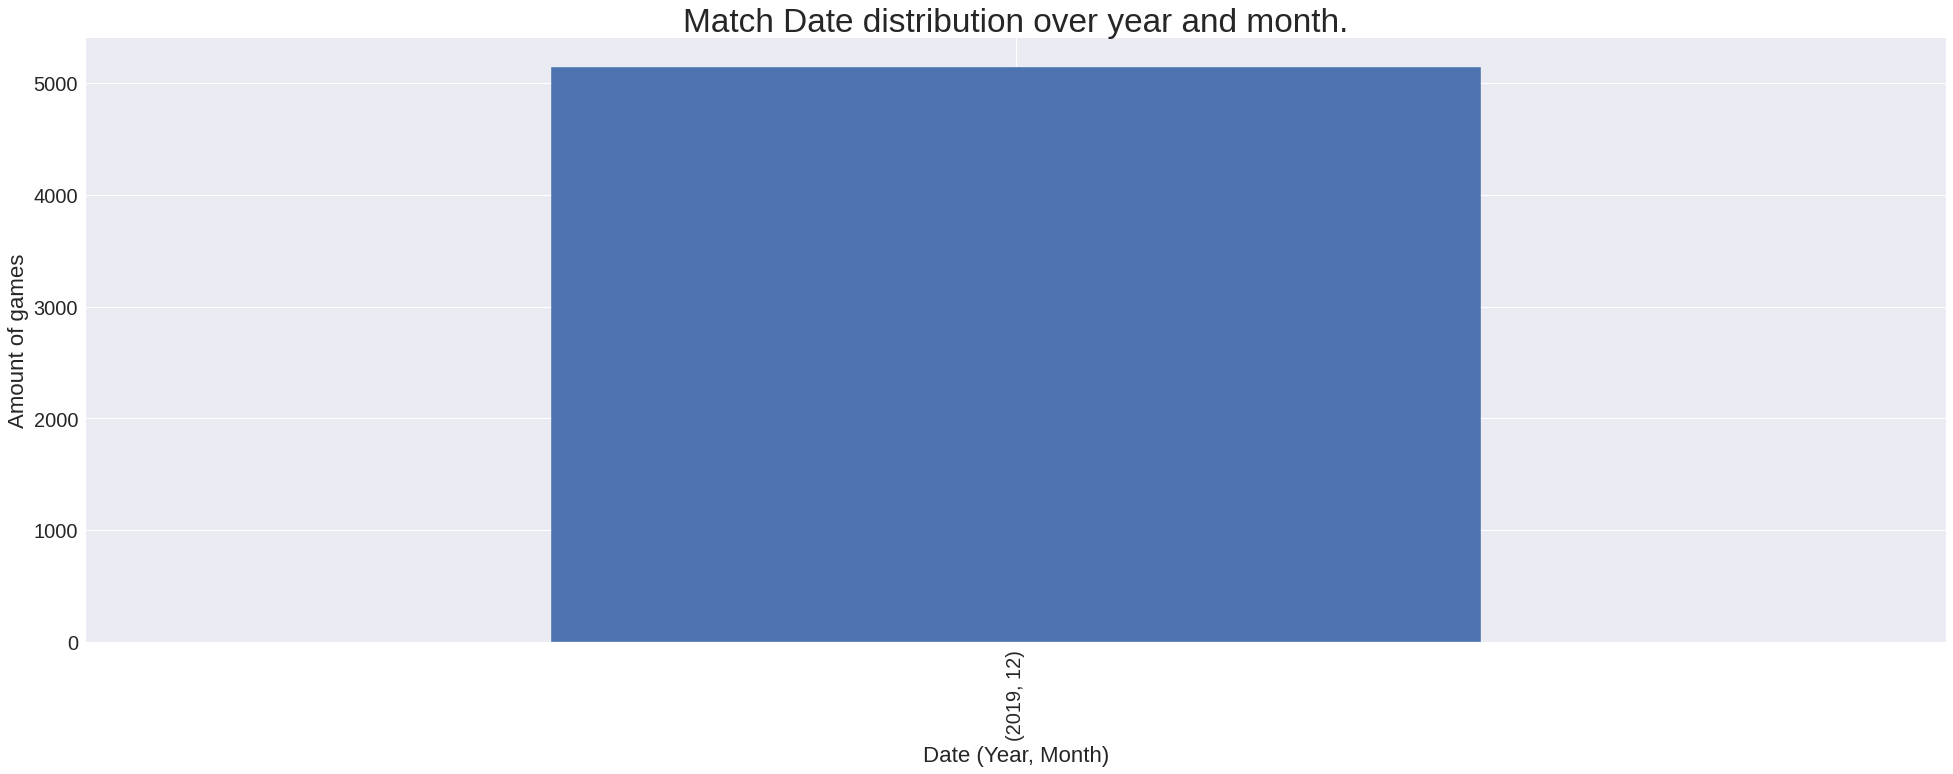

In [13]:

df['date'] = pd.to_datetime(df['match_date'], errors='coerce')

figure(figsize=(30, 10), dpi=80)
style.use(style='seaborn')
ax = df.groupby([df["date"].dt.year, df["date"].dt.month])['date'].count().plot(kind="bar", x='Match Date', y='Count')
ax.set_title("Match Date distribution over year and month.",fontsize=30)
ax.set_xlabel("Date (Year, Month)",fontsize=20)
ax.set_ylabel("Amount of games",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)

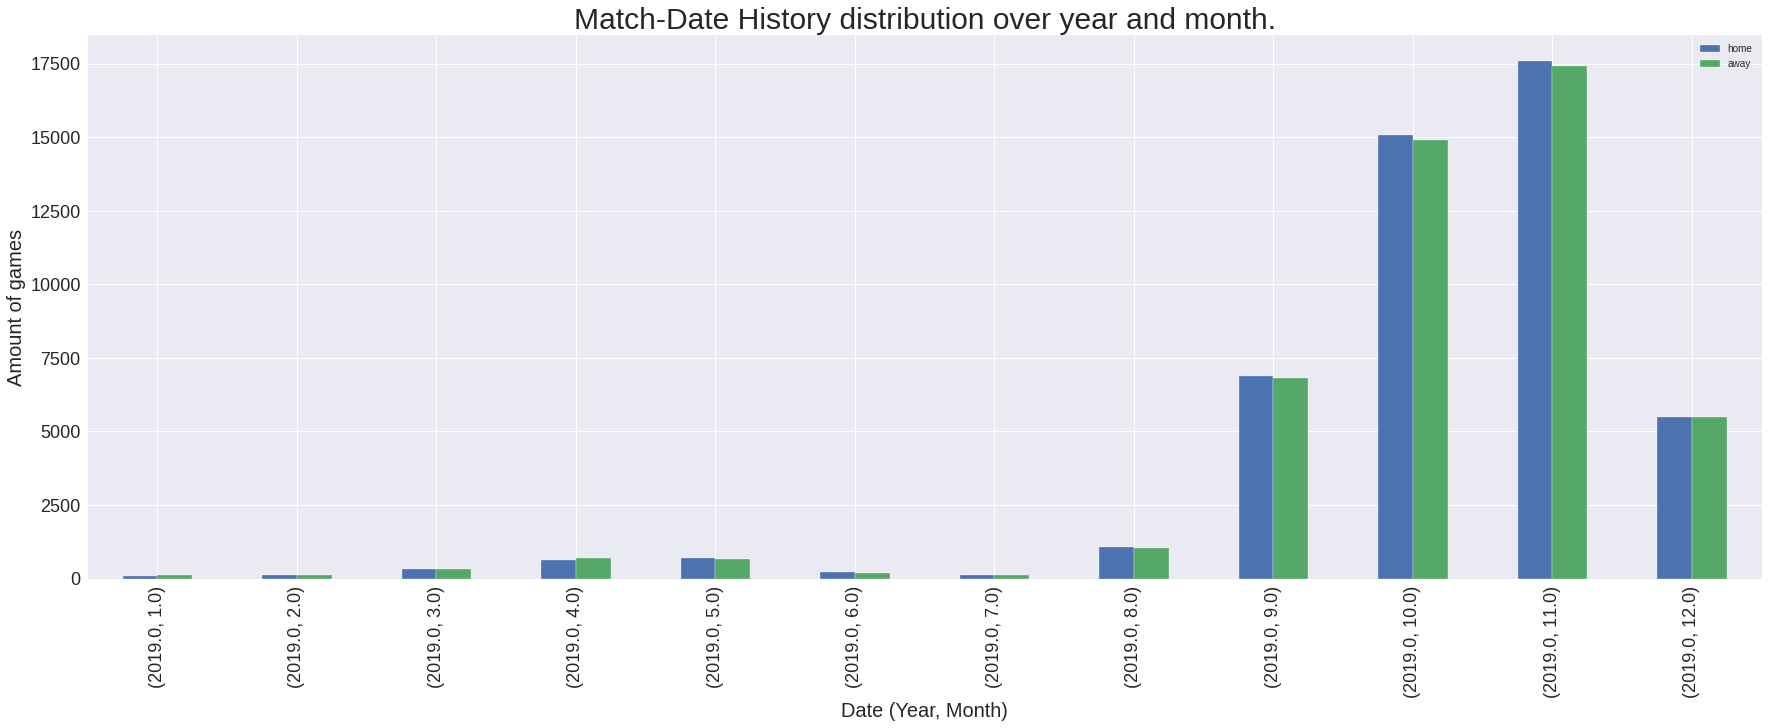

In [14]:
s = 'away_team_history_match_date_'
s2 = 'home_team_history_match_date_'
s_id = 'away_team_history_league_id'
s_id = 'home_team_history_league_id'

column_names = ["date"]
new_df = pd.DataFrame(columns = column_names)

history_df = df.loc[:, df.columns.str.contains(s)| df.columns.str.contains(s2)|(df.columns == 'id')]
history_df = pd.wide_to_long(history_df, stubnames=[s,s2], i="id",j='i')

history_df['home'] = pd.to_datetime(history_df['home_team_history_match_date_'], errors='coerce')
history_df['away'] = pd.to_datetime(history_df['away_team_history_match_date_'], errors='coerce')

home_count = history_df.groupby([history_df["home"].dt.year, history_df["home"].dt.month])['home'].count()
away_count = history_df.groupby([history_df["away"].dt.year, history_df["away"].dt.month])['away'].count()


res = pd.concat([home_count, away_count], axis=1)


style.use(style='seaborn')
ax = res.plot(kind="bar",figsize=(30, 10))
ax.set_title("Match-Date History distribution over year and month.",fontsize=30)
ax.set_xlabel("Date (Year, Month)",fontsize=20)
ax.set_ylabel("Amount of games",fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=18)
plt.show()
